In [54]:
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns


In [98]:
from sklearn.metrics import log_loss
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold

from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, roc_curve, classification_report

from sklearn.cluster import KMeans
from xgboost import XGBClassifier
import xgboost as xgb
import lightgbm as lgb

from sklearn.model_selection import (
  KFold, StratifiedKFold, RepeatedStratifiedKFold, cross_val_score, GridSearchCV, train_test_split
)

In [68]:
rawData=pd.read_csv('/content/drive/MyDrive/final/data/data.csv')
rawData

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.9950,['Carl Woitschach'],0.708,158648,0.1950,0,6KbQ3uYMLKb5jDxLF7wYDD,0.563000,10,0.1510,-12.428,1,Singende Bataillone 1. Teil,0,1928,0.0506,118.469,0.7790,1928
1,0.9940,"['Robert Schumann', 'Vladimir Horowitz']",0.379,282133,0.0135,0,6KuQTIu1KoTTkLXKrwlLPV,0.901000,8,0.0763,-28.454,1,"Fantasiestücke, Op. 111: Più tosto lento",0,1928,0.0462,83.972,0.0767,1928
2,0.6040,['Seweryn Goszczyński'],0.749,104300,0.2200,0,6L63VW0PibdM1HDSBoqnoM,0.000000,5,0.1190,-19.924,0,Chapter 1.18 - Zamek kaniowski,0,1928,0.9290,107.177,0.8800,1928
3,0.9950,['Francisco Canaro'],0.781,180760,0.1300,0,6M94FkXd15sOAOQYRnWPN8,0.887000,1,0.1110,-14.734,0,Bebamos Juntos - Instrumental (Remasterizado),0,1928-09-25,0.0926,108.003,0.7200,1928
4,0.9900,"['Frédéric Chopin', 'Vladimir Horowitz']",0.210,687733,0.2040,0,6N6tiFZ9vLTSOIxkj8qKrd,0.908000,11,0.0980,-16.829,1,"Polonaise-Fantaisie in A-Flat Major, Op. 61",1,1928,0.0424,62.149,0.0693,1928
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169904,0.1730,"['DripReport', 'Tyga']",0.875,163800,0.4430,1,4KppkflX7I3vJQk7urOJaS,0.000032,1,0.0891,-7.461,1,Skechers (feat. Tyga) - Remix,75,2020-05-15,0.1430,100.012,0.3060,2020
169905,0.0167,"['Leon Bridges', 'Terrace Martin']",0.719,167468,0.3850,0,1ehhGlTvjtHo2e4xJFB0SZ,0.031300,8,0.1110,-10.907,1,Sweeter (feat. Terrace Martin),64,2020-06-08,0.0403,128.000,0.2700,2020
169906,0.5380,"['Kygo', 'Oh Wonder']",0.514,180700,0.5390,0,52eycxprLhK3lPcRLbQiVk,0.002330,7,0.1080,-9.332,1,How Would I Know,70,2020-05-29,0.1050,123.700,0.1530,2020
169907,0.0714,"['Cash Cash', 'Andy Grammer']",0.646,167308,0.7610,0,3wYOGJYD31sLRmBgCvWxa4,0.000000,1,0.2220,-2.557,1,I Found You,70,2020-02-28,0.0385,129.916,0.4720,2020


중복값이 있는지 확인
  - 같은 노래가 있는지 확인
  - 곡이름, 아티스트, 키, mode(단/장조)가 같다면 같은 곡으로 간주.

In [35]:
rawData[rawData.duplicated(subset=['name','artists','key','mode'])]

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
91,0.9910,"['Frédéric Chopin', 'Vladimir Horowitz']",0.245,340973,0.0577,0,74rczPEWk2w3Fl8eENpzuf,0.882000,5,0.0704,-24.980,0,"Nocturne F Minor, Op. 55, No. 1",0,1928,0.0328,74.004,0.105,1928
469,0.9770,['Charlie Chaplin'],0.530,193824,0.2090,0,4qmz6OTEv1FMZPtlE4TCWJ,0.604000,10,0.1150,-10.901,0,"The Lone Prospector, Big Jim & Black Larsen",1,1942,0.0533,109.746,0.519,1942
609,0.9830,"['Sergei Rachmaninoff', 'William Kapell', 'Fri...",0.635,61467,0.0123,0,2qYaSlK0698oGi7Z9yrixw,0.955000,0,0.1070,-27.297,1,"Rhapsody on a Theme of Paganini, Op.43: Variat...",0,1945,0.0521,83.046,0.610,1945
652,0.9130,['William Kapell'],0.704,1325093,0.2230,0,2yezXgKe13D8hYgM7vzuvG,0.000000,2,0.3260,-24.480,0,Interview with William Kapell,0,1945,0.9350,112.485,0.403,1945
2099,0.8310,['Johnny Cash'],0.753,144036,0.2910,0,5BF0qhKCxdHDaX4HVUdKq3,0.000016,6,0.1280,-10.389,1,I Heard That Lonesome Whistle,13,1960,0.0405,92.719,0.545,1960
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169878,0.5740,['Porte Diferente'],0.811,228466,0.5800,0,2OU13apOMaGALVlSb2PzPi,0.000000,6,0.0748,-4.776,0,Por Tu Culpa,64,2020-02-26,0.0650,79.952,0.659,2020
169886,0.0236,['Lil Uzi Vert'],0.775,234627,0.7200,1,1Xd0PWZV3LCEGzc7fkjTeu,0.000000,11,0.1140,-5.353,0,P2,66,2020-03-13,0.1930,155.086,0.490,2020
169897,0.0220,['Future'],0.854,201907,0.5990,1,05TpY5Fov3Hgfp8V1KILZ8,0.000000,1,0.1730,-7.406,0,Tycoon,66,2020-05-15,0.3550,157.031,0.849,2020
169902,0.0227,"['Trey Songz', 'Summer Walker']",0.619,194576,0.7190,1,5QZ11AHm7xiytOGXGlxQi5,0.000000,0,0.0839,-4.111,1,Back Home (feat. Summer Walker),69,2020-04-29,0.1570,86.036,0.351,2020


In [69]:
rawData.drop_duplicates(inplace=True,subset=['name','artists','key','mode'])
rawData

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.9950,['Carl Woitschach'],0.708,158648,0.1950,0,6KbQ3uYMLKb5jDxLF7wYDD,0.563000,10,0.1510,-12.428,1,Singende Bataillone 1. Teil,0,1928,0.0506,118.469,0.7790,1928
1,0.9940,"['Robert Schumann', 'Vladimir Horowitz']",0.379,282133,0.0135,0,6KuQTIu1KoTTkLXKrwlLPV,0.901000,8,0.0763,-28.454,1,"Fantasiestücke, Op. 111: Più tosto lento",0,1928,0.0462,83.972,0.0767,1928
2,0.6040,['Seweryn Goszczyński'],0.749,104300,0.2200,0,6L63VW0PibdM1HDSBoqnoM,0.000000,5,0.1190,-19.924,0,Chapter 1.18 - Zamek kaniowski,0,1928,0.9290,107.177,0.8800,1928
3,0.9950,['Francisco Canaro'],0.781,180760,0.1300,0,6M94FkXd15sOAOQYRnWPN8,0.887000,1,0.1110,-14.734,0,Bebamos Juntos - Instrumental (Remasterizado),0,1928-09-25,0.0926,108.003,0.7200,1928
4,0.9900,"['Frédéric Chopin', 'Vladimir Horowitz']",0.210,687733,0.2040,0,6N6tiFZ9vLTSOIxkj8qKrd,0.908000,11,0.0980,-16.829,1,"Polonaise-Fantaisie in A-Flat Major, Op. 61",1,1928,0.0424,62.149,0.0693,1928
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169903,0.2100,"['LEGADO 7', 'Junior H']",0.795,218501,0.5850,0,52Cpyvd2dKb6XRn313nH87,0.000001,8,0.1120,-4.451,1,Ojos De Maniaco,68,2020-02-28,0.0374,97.479,0.9340,2020
169904,0.1730,"['DripReport', 'Tyga']",0.875,163800,0.4430,1,4KppkflX7I3vJQk7urOJaS,0.000032,1,0.0891,-7.461,1,Skechers (feat. Tyga) - Remix,75,2020-05-15,0.1430,100.012,0.3060,2020
169905,0.0167,"['Leon Bridges', 'Terrace Martin']",0.719,167468,0.3850,0,1ehhGlTvjtHo2e4xJFB0SZ,0.031300,8,0.1110,-10.907,1,Sweeter (feat. Terrace Martin),64,2020-06-08,0.0403,128.000,0.2700,2020
169906,0.5380,"['Kygo', 'Oh Wonder']",0.514,180700,0.5390,0,52eycxprLhK3lPcRLbQiVk,0.002330,7,0.1080,-9.332,1,How Would I Know,70,2020-05-29,0.1050,123.700,0.1530,2020


In [37]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

상관관계 높은 'danceability', 'energy', 'valence', 'loudness' 로 군집화


In [70]:
cluster_features=['danceability', 'energy', 'valence', 'loudness']
X = MinMaxScaler().fit_transform(rawData[cluster_features])
kmeans = KMeans(init="k-means++",
                n_clusters=2,
                random_state=15).fit(X)
rawData['kmeans'] = kmeans.labels_

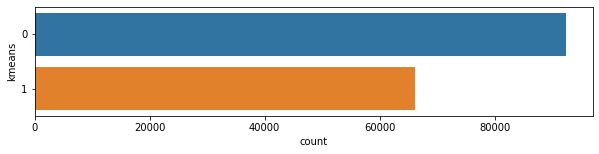

In [71]:
plt.figure( figsize = (10,2) )
sns.countplot( data = rawData, y = 'kmeans')
plt.show()

0이 좀더 많긴하다

In [78]:
obj_col=rawData.select_dtypes("object").columns
obj_col

Index(['artists', 'id', 'name', 'release_date'], dtype='object')

In [88]:
y=rawData['kmeans']
x=rawData.drop(columns=['artists', 'id', 'name', 'release_date','kmeans'], axis=1)

In [89]:
x

,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,valence,year
0,0.9950,0.708,158648,0.1950,0,0.563000,10,0.1510,-12.428,1,0,0.0506,118.469,0.7790,1928
1,0.9940,0.379,282133,0.0135,0,0.901000,8,0.0763,-28.454,1,0,0.0462,83.972,0.0767,1928
2,0.6040,0.749,104300,0.2200,0,0.000000,5,0.1190,-19.924,0,0,0.9290,107.177,0.8800,1928
3,0.9950,0.781,180760,0.1300,0,0.887000,1,0.1110,-14.734,0,0,0.0926,108.003,0.7200,1928
4,0.9900,0.210,687733,0.2040,0,0.908000,11,0.0980,-16.829,1,1,0.0424,62.149,0.0693,1928
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169903,0.2100,0.795,218501,0.5850,0,0.000001,8,0.1120,-4.451,1,68,0.0374,97.479,0.9340,2020
169904,0.1730,0.875,163800,0.4430,1,0.000032,1,0.0891,-7.461,1,75,0.1430,100.012,0.3060,2020
169905,0.0167,0.719,167468,0.3850,0,0.031300,8,0.1110,-10.907,1,64,0.0403,128.000,0.2700,2020
169906,0.5380,0.514,180700,0.5390,0,0.002330,7,0.1080,-9.332,1,70,0.1050,123.700,0.1530,2020


In [49]:
from sklearn.model_selection import train_test_split

In [90]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [59]:
from lightgbm import LGBMClassifier

In [95]:
params = {
  'learning_rate': [0.01, 0.001],
  'num_iterations ': [100, 300, 500],
  'max_depth': [3, 7, 11, 15],
  'objective': ['binary']
}

model = lgb.LGBMClassifier()
search = GridSearchCV( model, param_grid=params, scoring='roc_auc', cv=5)
results = search.fit( x_train, y_train )

In [96]:
print( results.best_params_ )
print( results.best_score_ )
best_model = results.best_estimator_

{'learning_rate': 0.01, 'max_depth': 11, 'num_iterations ': 100, 'objective': 'binary'}
0.9985832915339872


In [97]:
yhat_train = best_model.predict(x_train)
yhat_test = best_model.predict(x_test)

In [99]:
print( classification_report( y_train, yhat_train) )

              precision    recall  f1-score   support

           0       0.98      0.99      0.99     73887
           1       0.99      0.97      0.98     52933

    accuracy                           0.98    126820
   macro avg       0.98      0.98      0.98    126820
weighted avg       0.98      0.98      0.98    126820



In [107]:
print( classification_report( y_test, yhat_test) )

              precision    recall  f1-score   support

           0       0.98      0.99      0.98     18507
           1       0.99      0.97      0.98     13198

    accuracy                           0.98     31705
   macro avg       0.98      0.98      0.98     31705
weighted avg       0.98      0.98      0.98     31705



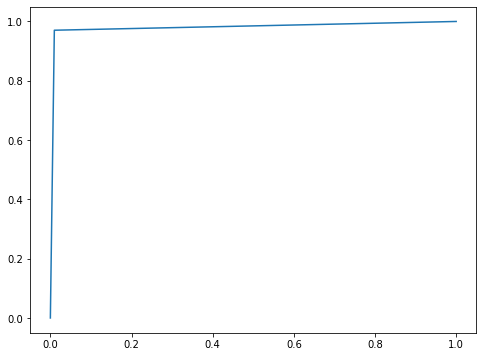

In [114]:
fpr, tpr, _ = roc_curve(y_test, yhat_test)
plt.figure( figsize=(8,6) )
plt.plot( fpr, tpr )

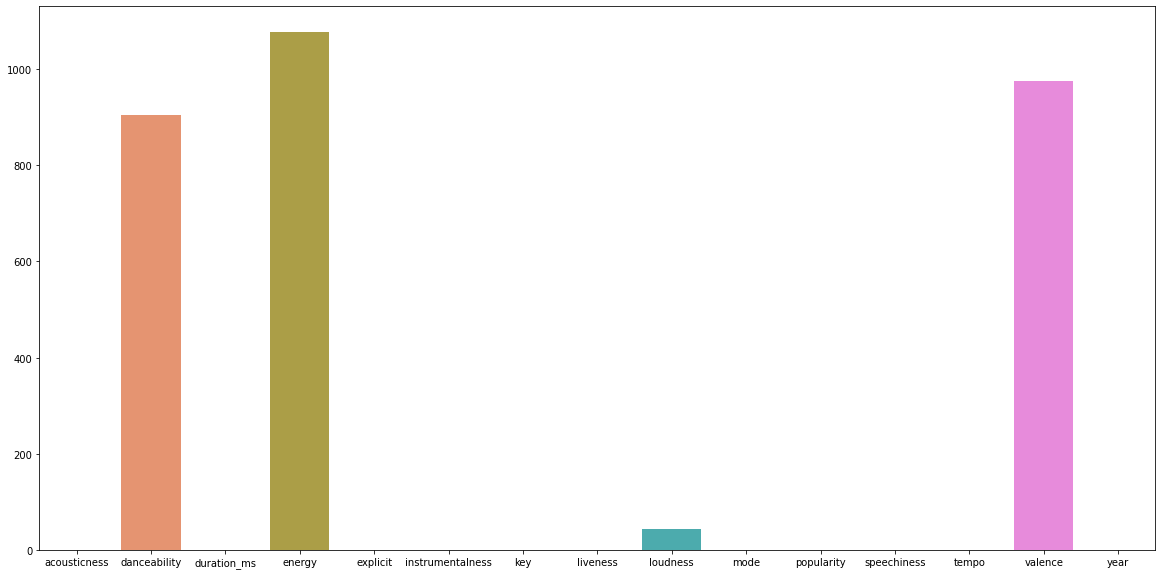

In [102]:
plt.figure( figsize=(20,10) )
sns.barplot( x_test.columns, best_model.feature_importances_ )

In [104]:
import lightgbm

In [108]:
model=LGBMClassifier().fit(x_train,y_train)

In [109]:
model.score(x_train,y_train)

0.9989197287494086

In [110]:
model.score(x_test,y_test)

0.9957419965305156

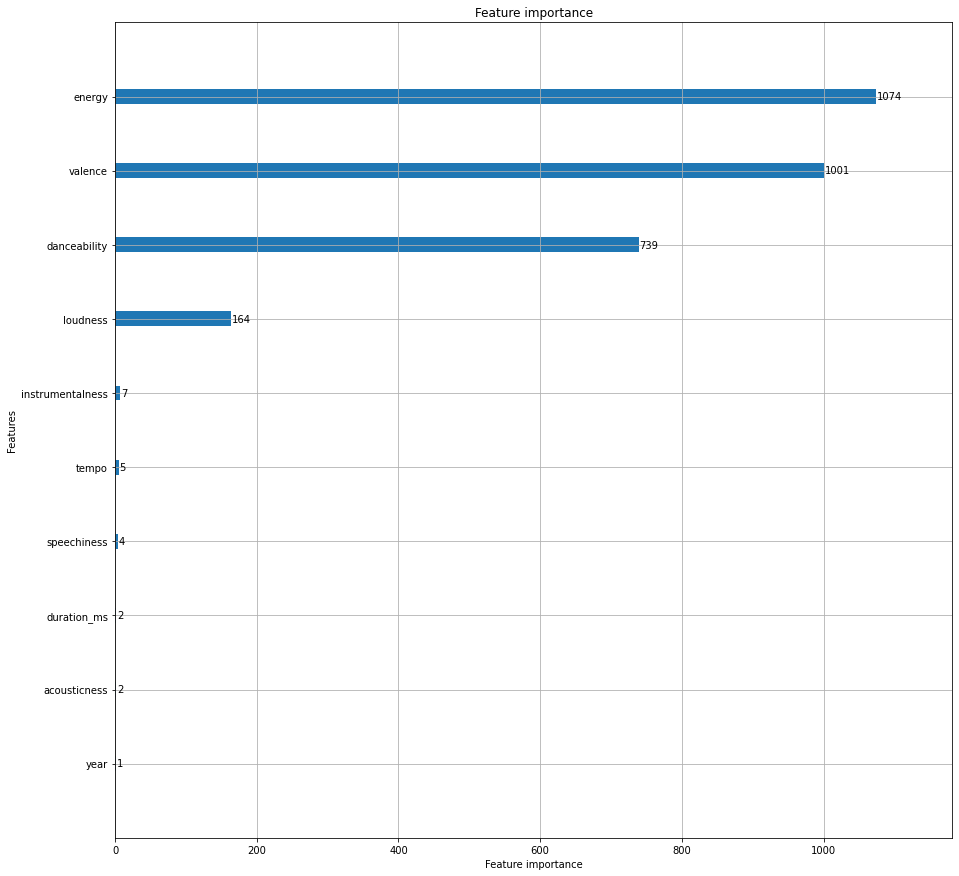

In [111]:
ax = lightgbm.plot_importance(model, max_num_features=10, figsize=(15,15))
plt.show()

In [116]:
cluster=rawData.groupby(by=rawData['kmeans'])
data=cluster.apply(lambda x: x.sort_values(["popularity"],ascending=False))
data

acousticness                                   artists  \
kmeans                                                                  
0      87852         0.0686                   ['Surf Mesa', 'Emilee']   
       87946         0.3210                                 ['Drake']   
       87844         0.3050                ['BENEE', 'Gus Dapperton']   
       87840         0.1040                           ['Roddy Ricch']   
       87952         0.0210            ['Lady Gaga', 'Ariana Grande']   
...                     ...                                       ...   
1      118447        0.9920                             ['Radharani']   
       118446        0.9380               ['Academia dos Renascidos']   
       118442        0.9810  ['Sergei Rachmaninoff', 'Moura Lympany']   
       118440        0.9930                 ['Sitara', 'Ashok Kumar']   
       1             0.9940  ['Robert Schumann', 'Vladimir Horowitz']   

               danceability  duration_ms  energy  explicit  \
kmeans                                                       
0      87852          0.674       176547  0.7740         0   
       87946          0.834       247059  0.4540         1   
       87844          0.863       223480  0.6310         1   
       87840          0.896       196653  0.5860         1   
       87952          0.672       182200  0.8550         0   
...                     ...          ...     ...       ...   
1      118447         0.547       193000  0.1790         0   
       118446         0.563       229791  0.1350         0   
       118442         0.311       280533  0.1640         0   
       118440         0.496       195440  0.2150         0   
       1              0.379       282133  0.0135         0   

                                   id  instrumentalness  key  liveness  \
kmeans                                                                   
0      87852   62aP9fBQKYKxi7PDXwcUAS          0.001880   11    0.3930   
       87946   127QTOFJsJQp5LbJbu3A1y          0.000006    1    0.1140   
       87844   4nK5YrxbMGZstTLbvj6Gxw          0.000030    7    0.1230   
       87840   0nbXyq5TXYPCO7pr3N8S4I          0.000000   10    0.7900   
       87952   24ySl2hOPGCDcxBxFIqWBu          0.000000    9    0.3230   
...                               ...               ...  ...       ...   
1      118447  5bTu7GZk2fnx2wjDaNYDyV          0.496000    5    0.1250   
       118446  5ZvwHxLQOX2Ku1QymWQa4S          0.000000    9    0.1100   
       118442  5WHL2fHDhnw5F2cPa8MRxz          0.898000    7    0.4810   
       118440  5TxwUhySxbew0czpyTKFpO          0.874000   10    0.1030   
       1       6KuQTIu1KoTTkLXKrwlLPV          0.901000    8    0.0763   

               loudness  mode  \
kmeans                          
0      87852     -7.567     0   
       87946     -9.750     0   
       87844     -4.689     1   
       87840     -6.687     0   
       87952     -3.764     1   
...                 ...   ...   
1      118447   -11.239     0   
       118446   -18.222     1   
       118442   -19.092     1   
       118440   -13.710     1   
       1        -28.454     1   

                                                            name  popularity  \
kmeans                                                                         
0      87852                ily (i love you baby) (feat. Emilee)          95   
       87946                                        Toosie Slide          95   
       87844                                          Supalonely          95   
       87840                                             The Box          95   
       87952                     Rain On Me (with Ariana Grande)          94   
...                                                          ...         ...   
1      118447                             Mere Dukh Ki Rain Kati           0   
       118446                              O filho da lavandeira           0   
       118442  13 Preludes, Op. 32: No. 4 in E Minor: Allegro... 